# Day4_Eigenvalues and SVD

In [1]:
import scipy
from scipy import linalg, matrix
import numpy as np

In [2]:
from sympy.solvers import solve
from sympy import Symbol

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## Equation Solver

In [4]:
x = Symbol('x')
solve(x**2 - 1, x)

[-1, 1]

## Eigenvalues with Equation

In [5]:
A = matrix([[1, 2], [3, -4]])
A

matrix([[ 1,  2],
        [ 3, -4]])

In [6]:
lam = Symbol('lam')

In [7]:
A_lam = A - lam*np.asmatrix(np.identity(2))
A_lam

matrix([[-1.0*lam + 1, 2],
        [3, -1.0*lam - 4]], dtype=object)

In [8]:
equation = A_lam[0,0]*A_lam[1,1] - A_lam[0,1]*A_lam[1,0]
equation

(-1.0*lam - 4)*(-1.0*lam + 1) - 6

In [9]:
solve(equation, lam)

[-5.00000000000000, 2.00000000000000]

## Eigenvalues and Eigenvectors with Package

In [10]:
eigenvalue, eigenvector = linalg.eig(A)

In [11]:
eigenvalue

array([ 2.+0.j, -5.+0.j])

In [12]:
eigenvector

array([[ 0.89442719, -0.31622777],
       [ 0.4472136 ,  0.9486833 ]])

## Eigen Value Decomposition

In [13]:
eigenvalue, eigenvector = linalg.eig(A)

In [14]:
eigenvalue.shape[0]

2

In [15]:
L = np.identity(eigenvalue.shape[0])
for i in range(eigenvalue.shape[0]) :
    L[i, i] = eigenvalue[i]
L

C:\Users\slcf\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  This is separate from the ipykernel package so we can avoid doing imports until


array([[ 2.,  0.],
       [ 0., -5.]])

In [16]:
S= np.asmatrix(eigenvector)
S

matrix([[ 0.89442719, -0.31622777],
        [ 0.4472136 ,  0.9486833 ]])

In [17]:
A*S

matrix([[ 1.78885438,  1.58113883],
        [ 0.89442719, -4.74341649]])

In [18]:
S*L

matrix([[ 1.78885438,  1.58113883],
        [ 0.89442719, -4.74341649]])

In [19]:
A*S==S*L

matrix([[ True, False],
        [False,  True]], dtype=bool)

In [20]:
np.allclose(A*S, S*L)

True

## SVD

In [21]:
A = matrix([[3, 1, 1], [-1, 3, 1]])
A

matrix([[ 3,  1,  1],
        [-1,  3,  1]])

In [22]:
U, s, V = linalg.svd(A, full_matrices=True)

In [23]:
U = np.asmatrix(U)
U

matrix([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]])

In [24]:
s = np.asmatrix(s)
s

matrix([[ 3.46410162,  3.16227766]])

In [25]:
V = np.asmatrix(V)
V

matrix([[ -4.08248290e-01,  -8.16496581e-01,  -4.08248290e-01],
        [ -8.94427191e-01,   4.47213595e-01,   5.27355937e-16],
        [ -1.82574186e-01,  -3.65148372e-01,   9.12870929e-01]])

In [26]:
list(A.shape)

[2, 3]

In [27]:
np.min(list(A.shape))

2

In [28]:
S = np.zeros((A.shape))
for i in range(np.min(list(A.shape))) :
    S[i, i] = s[0,i]
S

array([[ 3.46410162,  0.        ,  0.        ],
       [ 0.        ,  3.16227766,  0.        ]])

In [29]:
U*S*V

matrix([[ 3.,  1.,  1.],
        [-1.,  3.,  1.]])

## Image Compression with SVD

https://github.com/rameshputalapattu/jupyterexplore/blob/master/jupyter_interactive_environment_exploration.ipynb

In [33]:
import matplotlib.image as mpimg

img = mpimg.imread('sample.png')

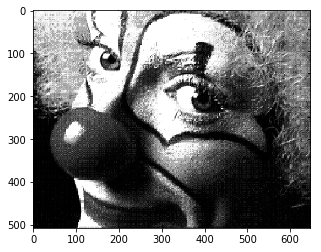

In [37]:
plt.imshow(img)

In [42]:
from skimage.color import rgb2gray
from skimage import img_as_ubyte, img_as_float

gray_images = {
    "Pierrot":rgb2gray(img_as_float(img))
}

In [43]:
def compress_svd(image, k):
    U, s, V = linalg.svd(image,full_matrices=False)
    reconst_matrix = np.dot(U[:,:k],np.dot(np.diag(s[:k]),V[:k,:]))
    
    return reconst_matrix, s

In [56]:
reconst_matrix, s = compress_svd(rgb2gray(img_as_float(img)),50)

In [66]:
s[:5]

array([ 266.53154921,   68.28481384,   57.90747286,   39.15993506,
         36.53256079])

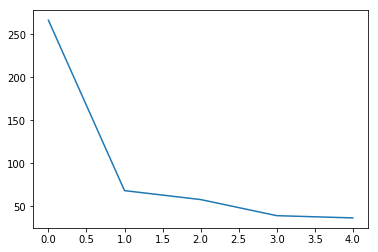

In [65]:
plt.plot(s[:5])

In [59]:
def compress_show_gray_images(img_name,k):
    
    image=gray_images[img_name]
    
    original_shape = image.shape
    reconst_img,s = compress_svd(image, k)
    
    fig,axes = plt.subplots(1,2,figsize=(8,5))
    
    axes[0].plot(s)
    
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    
    fig.tight_layout()

In [69]:
from ipywidgets import interact,interactive,interact_manual
interact(compress_show_gray_images,img_name=list(gray_images.keys()),k=(1,100));

A Jupyter Widget

## Applications

Data projection - pca

Data quantization - spectral clustering methods

Feature selection - apply svd keep high singular value dimensions

https://github.com/bwcho75/dataanalyticsandML/blob/master/Clustering/1.%20KMeans%20clustering-IRIS%202%20feature.ipynb

@ Iris Data

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.

Attribute Information:

sepal length in cm
sepal width in cm
petal length in cm
petal width in cm
class: -- Iris Setosa -- Iris Versicolour -- Iris Virginica

In [70]:
from sklearn import datasets
import pandas as pd
iris = datasets.load_iris()

labels = pd.DataFrame(iris.target)
labels.columns=['labels']

data = pd.DataFrame(iris.data)
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

data = pd.concat([data,labels],axis=1)

data.head()

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [71]:
feature = data[['Sepal length','Sepal width']]
feature.head()

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [79]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot  as plt
import seaborn as sns

model = SpectralClustering(n_clusters=3)
model.fit(feature)

predict = pd.DataFrame(model.fit_predict(feature))
predict.columns=['predict']

r = pd.concat([feature,predict],axis=1)

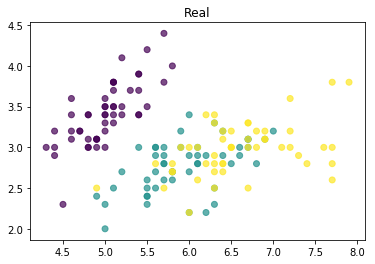

In [86]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=data['labels'],alpha=0.7)
plt.title("Real")
plt.show()

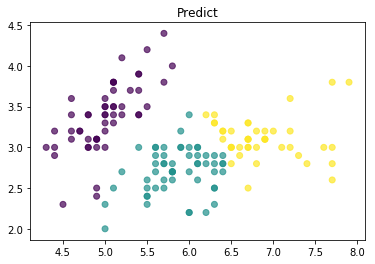

In [87]:
plt.scatter(r['Sepal length'],r['Sepal width'],c=r['predict'],alpha=0.7)
plt.title("Predict")
plt.show()